<a href="https://colab.research.google.com/github/humeraaa/Training-Workshop-at-JUW/blob/master/DigitRecogHT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget -q -r -A '*ubyte.gz' --no-parent  'http://yann.lecun.com/exdb/mnist/'
!rm -rf DATA
!mkdir DATA
!mv yann.lecun.com/exdb/mnist/* DATA/
!rm -rf yann.lecun.com
!gunzip DATA/*

In [0]:
!ls DATA

t10k-images-idx3-ubyte	train-images-idx3-ubyte
t10k-labels-idx1-ubyte	train-labels-idx1-ubyte


In [0]:
!pip3 install -q idx2numpy
!pip3 install -q --upgrade --force-reinstall matplotlib

In [0]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt

In [0]:
X_train = idx2numpy.convert_from_file('DATA/train-images-idx3-ubyte')
Y_train = idx2numpy.convert_from_file('DATA/train-labels-idx1-ubyte')

X_test = idx2numpy.convert_from_file('DATA/t10k-images-idx3-ubyte')
Y_test = idx2numpy.convert_from_file('DATA/t10k-labels-idx1-ubyte')

In [0]:
X_cross = X_train[50000:]
Y_cross = Y_train[50000:]

X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [0]:
print("X_Train",X_train.shape)
print("Y_Train",X_train.shape)

print("X_cross",X_cross.shape)
print("Y_cross",X_cross.shape)

print("X_Test",X_test.shape)
print("Y_Test",X_test.shape)

X_Train (50000, 28, 28)
Y_Train (50000, 28, 28)
X_cross (10000, 28, 28)
Y_cross (10000, 28, 28)
X_Test (10000, 28, 28)
Y_Test (10000, 28, 28)


In [0]:
np.set_printoptions(linewidth=np.nan)
print(X_train[12])


# Can you see THE BIG 3 in the image below ??

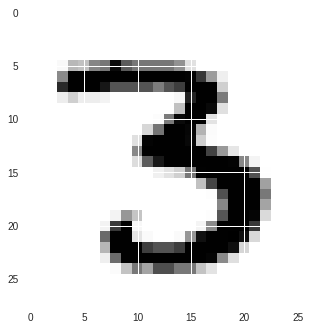

In [0]:
digit = X_train[12]
plt.imshow(digit)
plt.show()


# plt.imshow() treats 0 as brightest and 255 as darkest

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

In [0]:
X_train = X_train.reshape(X_train.shape[0], -1) # flattens X_train to 50,000 * (1*28*28) : Basically keeps the first dimension intact and flattens all other dimensions
X_train = X_train.astype('float32')
X_train /= 255

X_cross = X_cross.reshape(X_cross.shape[0], -1)
X_cross = X_cross.astype('float32')
X_cross /= 255

X_test = X_test.reshape(X_test.shape[0], -1)
X_test = X_test.astype('float32')
X_test /= 255


Y_train = np_utils.to_categorical(Y_train, 10)
Y_cross = np_utils.to_categorical(Y_cross, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

num_classes = Y_test.shape[1]

In [0]:
print("X_Train",X_train.shape)
print("Y_Train",X_train.shape)

print("X_cross",X_cross.shape)
print("Y_cross",X_cross.shape)

print("X_Test",X_test.shape)
print("Y_Test",X_test.shape)

X_Train (50000, 784)
Y_Train (50000, 784)
X_cross (10000, 784)
Y_cross (10000, 784)
X_Test (10000, 784)
Y_Test (10000, 784)


In [0]:
model = Sequential()

# First Hidden Layer (input layer is implicit from the input_dim)
model.add( Dense(units=100, input_shape=(28*28,), activation='relu',name='Hidden-1'))

# Second Hidden Layer
model.add( Dense(units=100, activation='relu',name='Hidden-2') )

# Output layer
model.add( Dense(units=num_classes, activation='sigmoid',name='OutputLayer') )

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# sgd stands for : stochastic gradient descent (the same gradient descent that we taught you in class)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-1 (Dense)             (None, 100)               78500     
_________________________________________________________________
Hidden-2 (Dense)             (None, 100)               10100     
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
#!pip3 install pydot
#!pip3 install graphviz
#!apt-get install graphviz

#Restart the runtime once they are installed. 

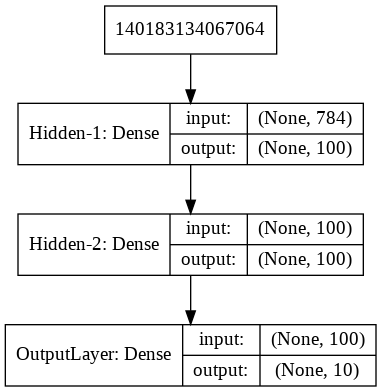

In [0]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image(filename='model_plot.png') 

In [0]:
history = model.fit(X_train, Y_train, validation_data=(X_cross, Y_cross), epochs=20, batch_size=200, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 29us/step - loss: 2.1598 - acc: 0.4077 - val_loss: 1.9772 - val_acc: 0.6222
Epoch 2/20
50000/50000 [==============================] - 1s 25us/step - loss: 1.5341 - acc: 0.7082 - val_loss: 0.9794 - val_acc: 0.8133
Epoch 3/20
50000/50000 [==============================] - 1s 26us/step - loss: 0.7691 - acc: 0.8276 - val_loss: 0.5731 - val_acc: 0.8670
Epoch 4/20
50000/50000 [==============================] - 1s 26us/step - loss: 0.5419 - acc: 0.8639 - val_loss: 0.4488 - val_acc: 0.8857
Epoch 5/20
50000/50000 [==============================] - 1s 25us/step - loss: 0.4534 - acc: 0.8807 - val_loss: 0.3910 - val_acc: 0.8976
Epoch 6/20
50000/50000 [==============================] - 1s 24us/step - loss: 0.4060 - acc: 0.8899 - val_loss: 0.3562 - val_acc: 0.9048
Epoch 7/20
50000/50000 [==============================] - 1s 26us/step - loss: 0.3751 - acc: 0.8961 - val_loss: 0.3332 - val_acc

In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


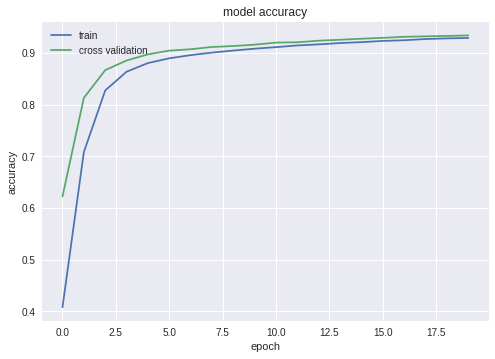

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'cross validation'], loc='upper left')
plt.show()

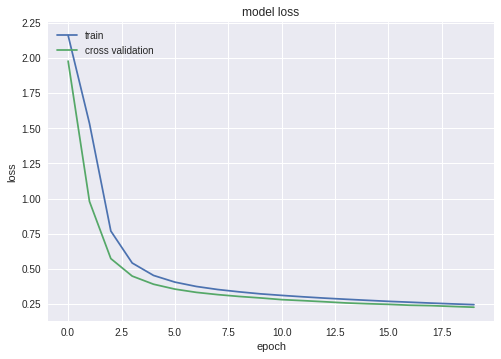

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'cross validation'], loc='upper left')
plt.show()

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9315


In [0]:
Y_pred = model.predict_classes(X_test,verbose=1)
Y_test = np.argmax(Y_test, axis=1) 

10000/10000 [==============================] - 0s 24us/step


In [0]:
correct_indices = list(np.where(Y_pred == Y_test)[0])
incorrect_indices = list(np.where(Y_pred != Y_test)[0])

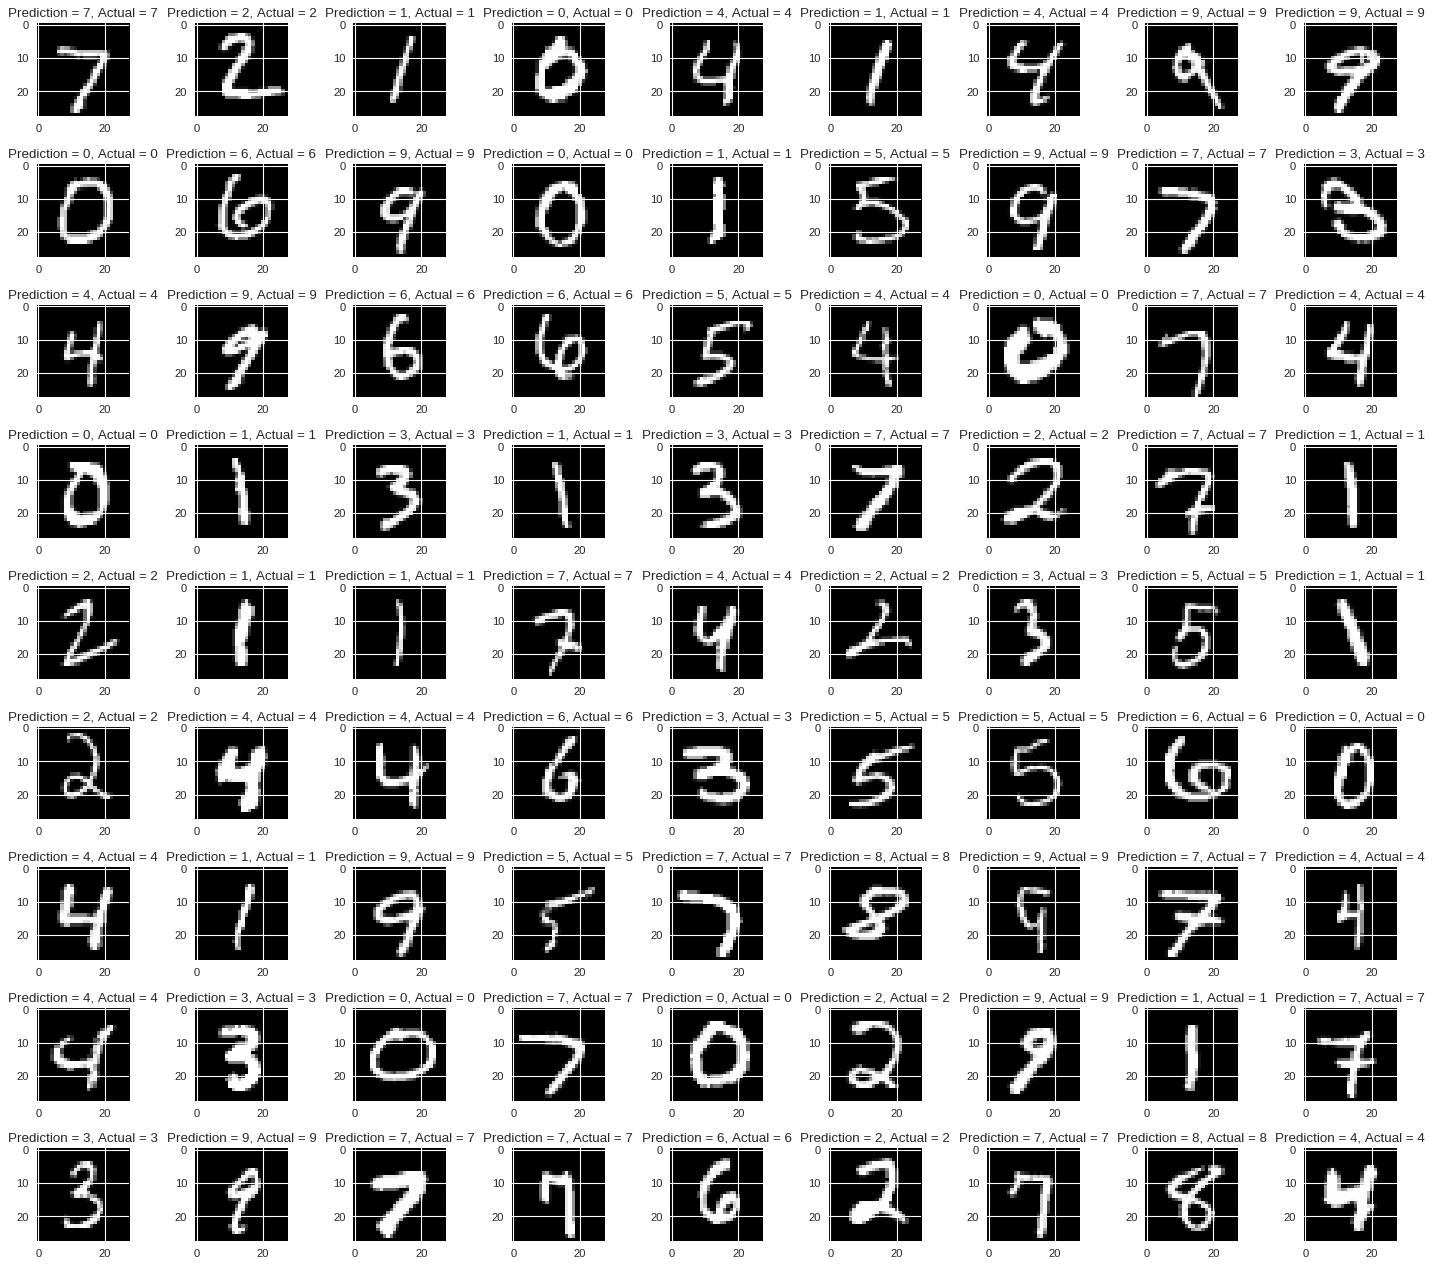

In [0]:
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

for i, correct in enumerate(correct_indices[:81]):
    plt.subplot(9,9,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Prediction = {}, Actual = {}".format(Y_pred[correct], Y_test[correct]))   

plt.tight_layout()

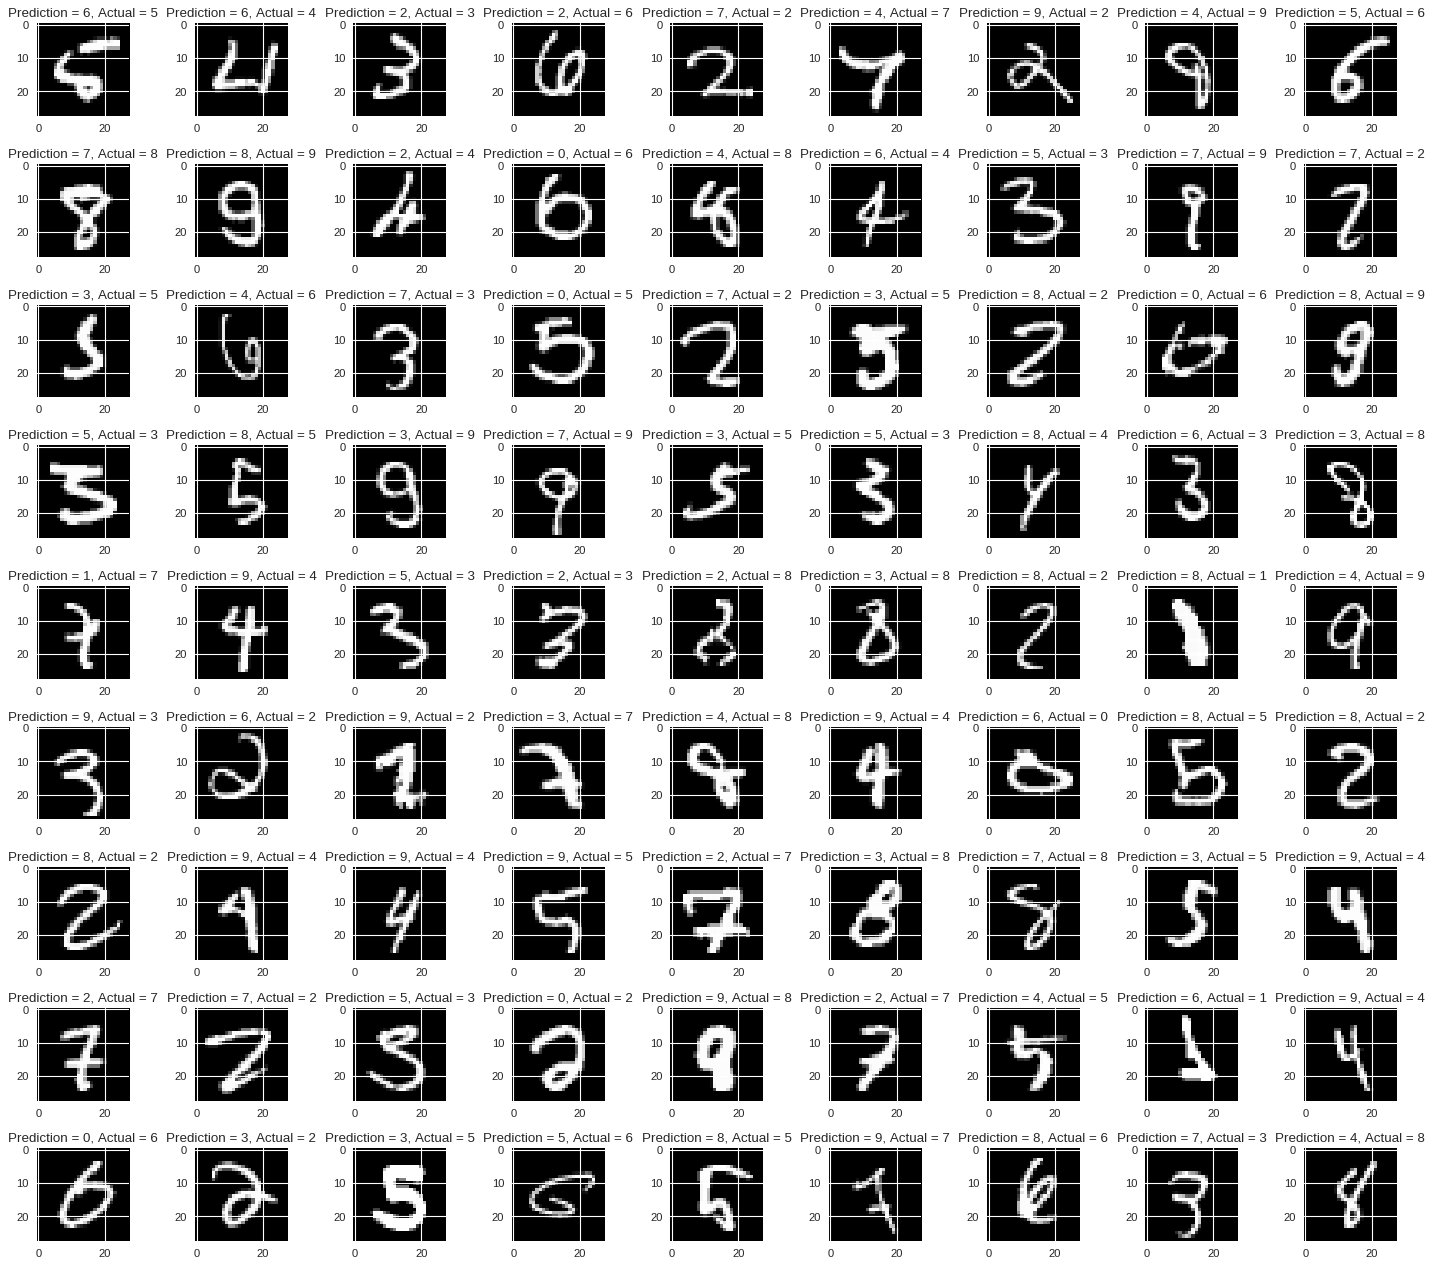

In [0]:
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

for i, incorrect in enumerate(incorrect_indices[:81]):
    plt.subplot(9,9,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Prediction = {}, Actual = {}".format(Y_pred[incorrect], Y_test[incorrect]))   

plt.tight_layout()